In [1]:
import pandas as pd
from src.models.RandomForestClassifier import RFClassifier
from scipy.stats import randint as sp_randint
from sklearn.preprocessing import LabelEncoder

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In this notebook we will train and save a random forest model then plot and show differents metrics for the model

In [15]:
RandomForest = RFClassifier()
#load train and test split
X_train = pd.read_csv('../data/processed/with_outliers/train_over.csv')
y_train = X_train['class']
X_train = X_train.drop(['class'], axis=1)
X_test = pd.read_csv('../data/processed/with_outliers/test.csv')
y_test = X_test['class']
X_test = X_test.drop(['class'], axis=1)
#encode labels
label_encoder = LabelEncoder().fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)


We do a grid search to find the best parameters for the model

We run this code in google colab and save the data of the grid searh in a csv file

 [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1TqehMW7PY5Uu6mqdNrI-QY-2_uj9qFE5?authuser=2#scrollTo=yZtNVPu0hrp-)

In [16]:
#random search for random forest

clf = RFClassifier()
param_dist = {
    'bootstrap': [True],
    'random_state': [0],
    'max_depth': sp_randint(10, 100),
    'max_features': sp_randint(1, 8),
    'min_samples_leaf': sp_randint(1, 10),
    'min_samples_split': sp_randint(5, 20),
    'n_estimators': sp_randint(100, 700),
    'class_weight': [None,'balanced', 'balanced_subsample'],
    'criterion': ['gini'],
    'warm_start': [False],
    'ccp_alpha': [0],
}
clf.hyperparameter_tuning(X_train,y_train,param_dist,'halving-random',3,'f1_macro')
print(clf.best_params)

{'model__bootstrap': True, 'model__ccp_alpha': 0, 'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': 91, 'model__max_features': 6, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 655, 'model__random_state': 0, 'model__warm_start': False}



In [ ]:
clf = RFClassifier()
clf.load(new_name="RF_withoutoutliers")

Show results of the model, plot the confusion matrix and show the classification report

Inference time : 5.546904802322388e-05 seconds
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11889
           1       0.95      0.94      0.94      3792
           2       1.00      1.00      1.00      4319

    accuracy                           0.98     20000
   macro avg       0.97      0.97      0.97     20000
weighted avg       0.98      0.98      0.98     20000

auc score for class 0:  0.9949445762527894
auc score for class 1:  0.9928009973717203
auc score for class 2:  0.9997035934624984


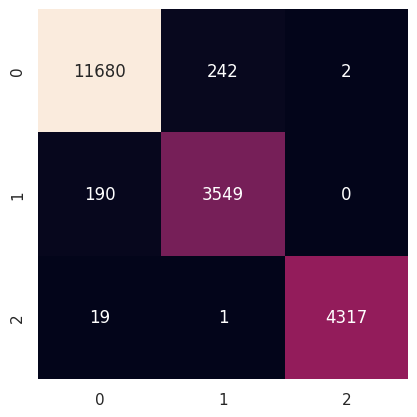

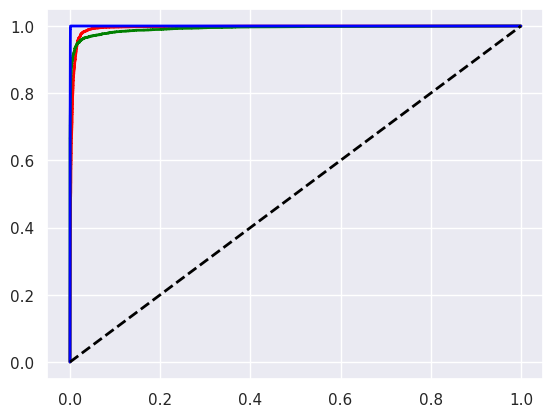

In [19]:
clf.evaluate(X_test, y_test)

Save the model to be used for comparison

In [18]:
clf.save('RandomForest_with_outliers_oversampled')